#Podcast Insights: From Data to Recommendation 🎧

##Data
* `users.csv`: Contains user demographic and profile information.

* `episodes.csv`: Includes details about podcast episodes such as title, category, and metadata.

* `listens.json`: Records user listening history for the episodes.



### Read the Data

In [29]:
import pandas as pd

users_data = pd.read_csv('users.csv')
episodes_data = pd.read_csv('episodes.csv')
listens_data = pd.read_json('listens.json')


## 1️⃣ Data Exploration and Preprocessing

### Explore the Data

In [30]:
print(users_data.head())
print(users_data.info())

   user_id  age  gender       country
0        1   38  female       Morocco
1        2   30  female        Jordan
2        3   42    male  Saudi Arabia
3        4   57  female         Egypt
4        5   51  female        Jordan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  20 non-null     int64 
 1   age      20 non-null     int64 
 2   gender   20 non-null     object
 3   country  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes
None


In [31]:
print(episodes_data.head())
print(episodes_data.info())

   episode_id      title    category
0           1  Episode 1    Religion
1           2  Episode 2  Technology
2           3  Episode 3     Society
3           4  Episode 4        News
4           5  Episode 5    Politics
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   episode_id  30 non-null     int64 
 1   title       30 non-null     object
 2   category    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes
None


In [32]:
print(listens_data.head())
print(listens_data.info())

   user_id  episode_id  duration_seconds
0       16          30                60
1        6           8               120
2        6          13                60
3        6          27              1500
4       17           9              1500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           100 non-null    int64
 1   episode_id        100 non-null    int64
 2   duration_seconds  100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


###Handle Missing or Invalid Values

In [33]:
# Check missing values
print(users_data.isnull().sum())
print(episodes_data.isnull().sum())
print(listens_data.isnull().sum())

user_id    0
age        0
gender     0
country    0
dtype: int64
episode_id    0
title         0
category      0
dtype: int64
user_id             0
episode_id          0
duration_seconds    0
dtype: int64


**The output shows that there are no missing values (NaNs) in any of the three datasets:**
 - The `users.csv` file has complete data for all columns: user_id, age, gender, and country.
 - The `episodes.csv` file is fully populated with no missing values in episode_id, title, or category.
 - The `listens.json` file also contains complete data with no missing values in user_id, episode_id, or duration_seconds.

Therefore, no data cleaning is needed for missing values, and we can proceed to the merging and analysis steps.

In [34]:
# Merge listens data with users data on 'user_id'
merged_df = listens_data.merge(users_data, on='user_id', how='left')

# Merge the result with episodes data on 'episode_id'
merged_df = merged_df.merge(episodes_data, on='episode_id', how='left')

# Preview the merged dataset and its dimensions
print(merged_df.head())
print(merged_df.shape)

# Comment:
# The merging process combines listening records with user and episode information.
# By joining on 'user_id' and 'episode_id', we enrich each listening entry with user demographics and episode details.
# The resulting dataset (merged_df) can now be used for deeper analysis, including user behavior patterns and recommendation logic.

   user_id  episode_id  duration_seconds  age  gender       country  \
0       16          30                60   24  female  Saudi Arabia   
1        6           8               120   59    male       Morocco   
2        6          13                60   59    male       Morocco   
3        6          27              1500   59    male       Morocco   
4       17           9              1500   21    male  Saudi Arabia   

        title category  
0  Episode 30   Sports  
1   Episode 8   Sports  
2  Episode 13  Society  
3  Episode 27     News  
4   Episode 9   Sports  
(100, 8)


## 2️⃣ Data Analysis and User Behavior Insights

**What are the most listened-to episode categories?**



Most listened-to categories:
category
Society       32
Sports        30
News          16
Religion      10
Politics       7
Technology     5
Name: count, dtype: int64


<ipython-input-35-0aaa97731918>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')  # Plot count vs. category


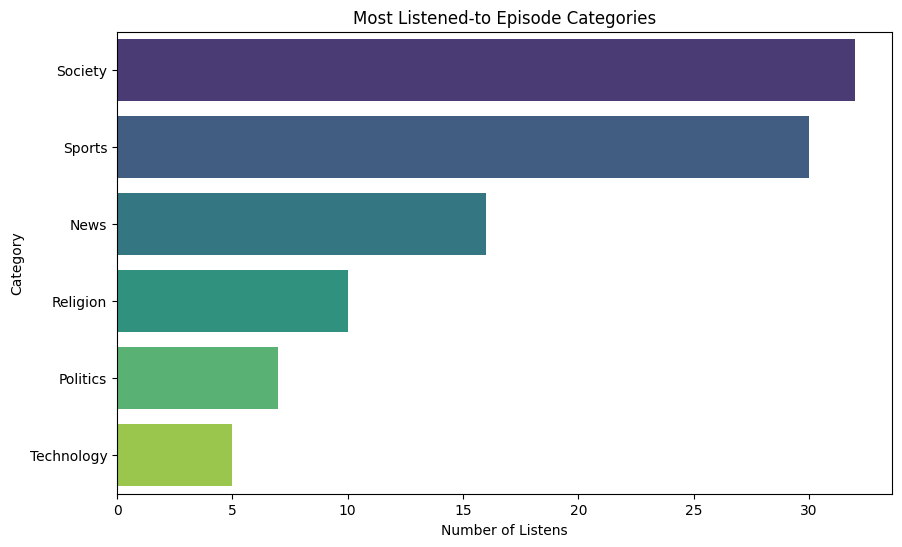

In [35]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of listens for each episode category
# This helps us identify which categories are the most popular overall
category_counts = merged_df['category'].value_counts()

# Print the most listened-to categories in descending order
print("Most listened-to categories:")
print(category_counts)

# Create a bar plot to visualize the popularity of each category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')  # Plot count vs. category

# Add title and labels to the chart
plt.title('Most Listened-to Episode Categories')
plt.xlabel('Number of Listens')
plt.ylabel('Category')

# Show the plot
plt.show()


**Key Finding:**

The most popular podcast category among users is Society, followed by Sports and News. Categories like Religion, Politics, and Technology received significantly fewer listens, suggesting users are more engaged with socially and culturally oriented content.



**Is there a difference in average listening time between males and females?**

Average listening duration (in seconds) by gender:
gender
female    753.962264
male      573.191489
Name: duration_seconds, dtype: float64


<ipython-input-36-e83333665219>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='gender', y='duration_seconds', palette='pastel')


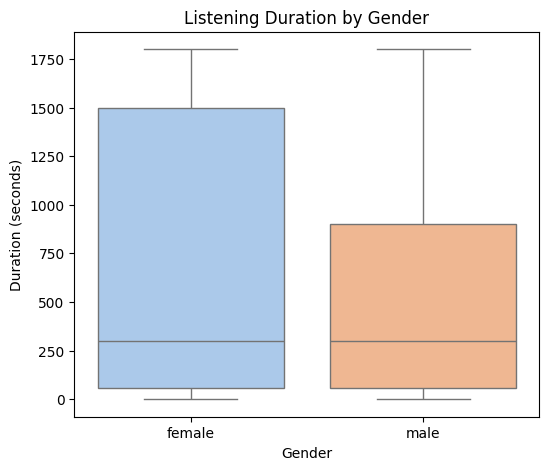

In [36]:
# Calculate the average listening duration (in seconds) for each gender
# This helps us see if there's a difference in engagement between males and females
gender_duration = merged_df.groupby('gender')['duration_seconds'].mean()

# Print the average duration for each gender
print("Average listening duration (in seconds) by gender:")
print(gender_duration)

# Create a boxplot to visualize the distribution of listening durations by gender
plt.figure(figsize=(6, 5))
sns.boxplot(data=merged_df, x='gender', y='duration_seconds', palette='pastel')

# Add title and axis labels
plt.title('Listening Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')

# Display the plot
plt.show()


**Key Finding:**

On average, female users tend to listen longer than male users. The boxplot shows a higher median and upper range for females, indicating greater engagement or session length among women.




**What is the average number of episodes a user listens to?**

In [37]:
# Count the number of unique episodes listened to by each user
# This shows how many different episodes each user has engaged with
listens_per_user = merged_df.groupby('user_id')['episode_id'].nunique()

# Calculate the average number of episodes listened to per user
average_listens = listens_per_user.mean()

# Print the result with two decimal places
print(f"Average number of unique episodes a user listens to: {average_listens:.2f}")


Average number of unique episodes a user listens to: 5.00


**Key Finding:**

Users don’t consume many episodes on average (only 5), suggesting that recommendation quality matters more than quantity.

**What additional analysis or indicator could help understand user behavior better, and why?**

To gain deeper behavioral insights, we analyzed the most listened-to podcast categories across different age groups. This allows us to observe how content preferences vary with user age.



<ipython-input-38-47b596427ba6>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category = merged_df.groupby(['age_group', 'category'])['episode_id'].count().reset_index()


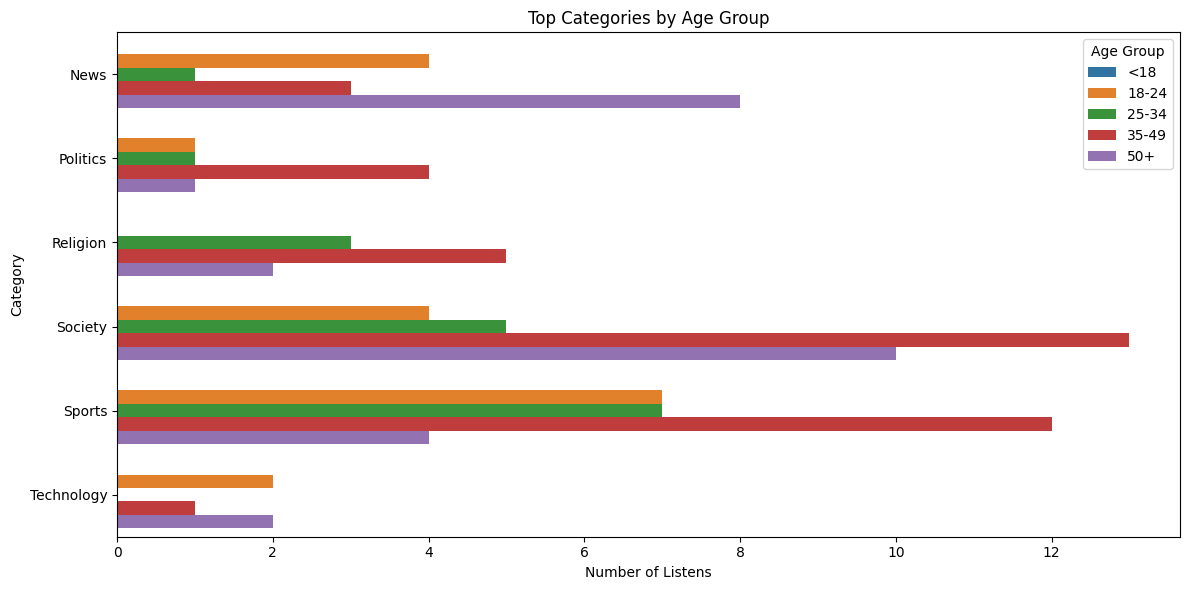

In [38]:
# Create age groups by dividing users into bins
# These bins categorize users into common age ranges
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18-24', '25-34', '35-49', '50+']

# Assign each user to an age group based on their age
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

# Group the data by age group and episode category
# Count how many listens occurred in each age group for each category
age_category = merged_df.groupby(['age_group', 'category'])['episode_id'].count().reset_index()

# Rename the column for clarity (from episode_id count to listen_count)
age_category = age_category.rename(columns={'episode_id': 'listen_count'})

# Create a bar plot to visualize the top categories by age group
plt.figure(figsize=(12, 6))
sns.barplot(data=age_category, x='listen_count', y='category', hue='age_group')

# Add plot title and axis labels
plt.title('Top Categories by Age Group')
plt.xlabel('Number of Listens')
plt.ylabel('Category')

# Add legend with a title
plt.legend(title='Age Group')

# Adjust layout to ensure everything fits properly
plt.tight_layout()

# Display the plot
plt.show()


**Key Finding:**

* The 35–49 age group has the highest listening counts across most categories, especially:

"Society" and "Sports".

* The 50+ age group shows a clear preference for:

"Society" and "News".

* The <18 age group has relatively low listening activity overall.

* "Technology" is the least popular category across all age groups.

**Clear differences in preferences by age:**

Younger users tend to prefer entertainment-related content like sports.

Older users prefer informative content such as news and society.

In [39]:
merged_df

,user_id,episode_id,duration_seconds,age,gender,country,title,category,age_group
0,16,30,60,24,female,Saudi Arabia,Episode 30,Sports,18-24
1,6,8,120,59,male,Morocco,Episode 8,Sports,50+
2,6,13,60,59,male,Morocco,Episode 13,Society,50+
3,6,27,1500,59,male,Morocco,Episode 27,News,50+
4,17,9,1500,21,male,Saudi Arabia,Episode 9,Sports,18-24
...,...,...,...,...,...,...,...,...,...
95,16,28,900,24,female,Saudi Arabia,Episode 28,News,18-24
96,19,9,60,42,male,Egypt,Episode 9,Sports,35-49
97,12,2,1500,52,female,Jordan,Episode 2,Technology,50+
98,1,1,1800,38,female,Morocco,Episode 1,Religion,35-49


---
**In addition to analyzing preferences based on age, we also examined how podcast category preferences vary by country.**

This helps uncover cultural or regional trends that influence listening behavior.


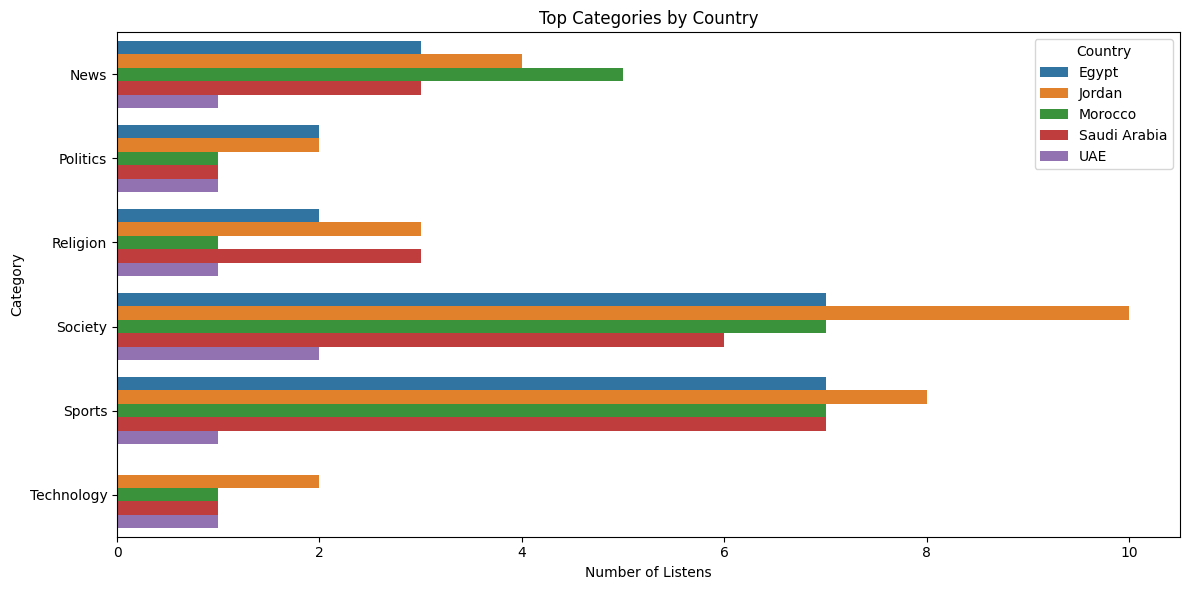

In [40]:
# Grouping the number of listens by country and category
# This helps identify which categories are most popular in each country
country_category = merged_df.groupby(['country', 'category'])['episode_id'].count().reset_index()

# Rename the column for clarity
country_category = country_category.rename(columns={'episode_id': 'listen_count'})

# Plotting the number of listens for each category by country
plt.figure(figsize=(12, 6))

# Creating a bar plot where categories are on the y-axis and listen counts are grouped by country
sns.barplot(data=country_category, x='listen_count', y='category', hue='country')

# Adding plot title and labels
plt.title('Top Categories by Country')
plt.xlabel('Number of Listens')
plt.ylabel('Category')

# Display legend with title
plt.legend(title='Country')

# Adjust layout to avoid cutting off labels
plt.tight_layout()

# Show the plot
plt.show()



**Key Finding:**
* Society is the top category in all countries, especially Jordan.

* Sports is also popular, notably in Jordan and Saudi Arabia.

* News is most listened to in Morocco.

* Religion and Politics have moderate interest, varying by country.

* Technology has the lowest listenership overall.

* UAE shows generally lower engagement across categories.



## 3️⃣ Generating Initial Content Recommendations

In [41]:
def recommend_episodes(user_id: int, listens_df, episodes_df, top_n=3):
    # Get episodes listened to by the user
    user_listens = listens_df[listens_df['user_id'] == user_id]

    # If the user has no listening history, return a message
    if user_listens.empty:
        return f"No listening history found for user {user_id}."

    # Merge with episodes data to get category information
    listened_with_categories = user_listens.merge(episodes_df, on='episode_id')

    # Identify the most frequently listened-to category by the user
    top_category = listened_with_categories['category'].value_counts().idxmax()

    # Get the list of episode IDs the user has already listened to
    listened_ids = user_listens['episode_id'].unique()

    # Filter for episodes in the top category that the user hasn't listened to yet
    recommended = episodes_df[
        (episodes_df['category'] == top_category) &
        (~episodes_df['episode_id'].isin(listened_ids))
    ]

    # If no new episodes are found in the top category, return a message
    if recommended.empty:
        return f"No new episodes to recommend in category '{top_category}' for user {user_id}."

    # Return the top N recommended episodes (by default 3), including ID, title, and category
    return recommended[['episode_id', 'title', 'category']].head(top_n)



In [42]:
recommend_episodes(user_id=10,
                   listens_df= listens_data,
                   episodes_df=episodes_data)

,episode_id,title,category
5,6,Episode 6,Society
13,14,Episode 14,Society
19,20,Episode 20,Society


In [43]:
recommend_episodes(user_id=5,
                   listens_df= listens_data,
                   episodes_df=episodes_data)

,episode_id,title,category
3,4,Episode 4,News
9,10,Episode 10,News
17,18,Episode 18,News


**Key Findings from the Recommendation Function:**

* The function relies on the user’s actual listening history to identify their top preferred category.

* Recommendations focus on new episodes within the user’s most listened-to category, increasing the chances of user interest.

* If the user has no listening history, the function clearly returns a message instead of giving random recommendations.

* Episodes the user has already listened to are excluded to avoid repetitive suggestions.

* The number of recommended episodes can be easily adjusted via the top_n parameter.

This approach provides a simple and initial content recommendation based solely on individual user preferences, without requiring complex models or additional data.